In [1]:
import os
import pandas as pd

import seaborn as sns
sns.set_theme(context="notebook", font_scale=1.05, 
              style='whitegrid',  #  Darkgrid Whitegrid Dark White Ticks
              palette='PRGn')
import matplotlib.pyplot as plt
%matplotlib inline

palette_ptol6 = ['#4477AA', '#88CCEE', '#117733', '#DDCC77', '#CC6677', '#AA4499']
palette_myptol5 = ['#4477AA', '#88CCEE', '#117733', '#CC6677', '#AA4499']
palette_ptol12 = ['#332288', '#6699CC', '#88CCEE', '#44AA99', '#117733']
palette_myptol3 = ['#4477AA', '#CC6677', '#117733']

# FP_DATA_RAW = os.path.join('..', '..', 'data', 'mam_mturk_070917.csv')
FP_DATA = os.path.join('..', '..', 'data', 'turk', 'mturk-recoded.csv')

pd.set_option('display.max_rows', 50)

In [2]:
ITEMS = ['birth', 'religion', 'illegal', 'death', 'increase', 'science', 'fraud', 'mmr', 'deficit', 'avg']
DEMO = ['age', 'gender', 'educ', 'hisla', 'race']
POL = ['pid', 'pid_strength_1']
INTEREST = ['interest_1', 'vote_1', 'deficits', 'djt_2']
MISC = ['question_type']
USECOLS = ITEMS + DEMO + POL + INTEREST + MISC

df = pd.read_csv(FP_DATA, usecols=USECOLS)

df.head(2)

,age,gender,educ,hisla,race,interest_1,vote_1,deficits,djt_2,pid,...,birth,religion,illegal,death,increase,science,fraud,mmr,deficit,avg
0,1982,Male,Four year college graduate,No,White,8,8,Both parties are equally good or bad at that,1,Independent,...,False,NaN,NaN,NaN,False,False,False,False,False,0.0
1,1996,Male,Some college,No,White,3,2,Both parties are equally good or bad at that,2,Democrat,...,False,False,NaN,False,False,False,False,False,NaN,0.0


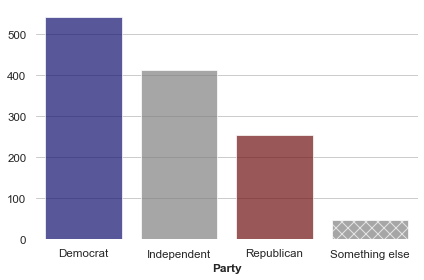

In [3]:
# Plot dist of party
bar = sns.barplot(x='pid', y=0, data=df.groupby('pid').size().reset_index(), 
                  palette=['navy', 'gray', 'maroon', 'gray'],
                  alpha=.7
                 )

for i, thisbar in enumerate(bar.patches):
    if i==3:
        thisbar.set_hatch('xx')
        
plt.ylabel('')
plt.xlabel('Party', fontweight='bold', size=12)

sns.despine(left=True, bottom=True)
plt.tight_layout()

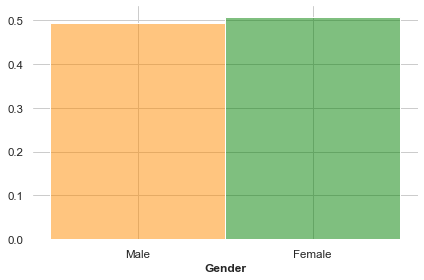

In [4]:
# Plot dist of gender
sns.histplot(x='gender', data=df.query('gender==gender'), 
             stat='probability',
             hue='gender', 
             palette=['darkorange', 'green'],
             legend=False
            )

plt.ylabel('')
plt.xlabel('Gender', fontweight='bold', size=12)

sns.despine(left=True, bottom=True)
plt.tight_layout()

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


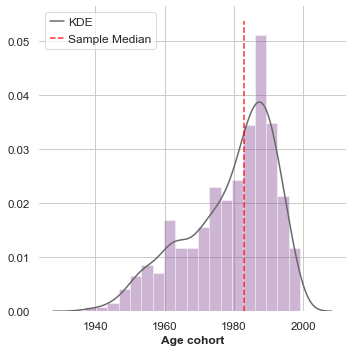

In [5]:
# Plot dist. of age cohort
fig, ax = plt.subplots(figsize=(5, 5))

sns.distplot(x=df.age, 
            kde=True,
#             rug=True,
#             rug_kws={"color": "dimgray", "height":.03, "alpha":0.4, "label": "Actual values"},
            kde_kws={"color": "dimgray", "lw": 1.5, "alpha":0.8, "label": "KDE"},
           )

plt.vlines(df.age.median(), 0, ax.get_ylim()[1], color='r', linestyles='--', alpha=0.8, label='Sample Median')

ax.legend(loc='best', fontsize=12, frameon=True,
          fancybox=True, framealpha=0.7, 
          handlelength=1.2, handletextpad=.3)  

plt.ylabel('')
plt.xlabel('Age cohort', fontweight='bold', size=12)
# plt.yticks([0,50,100,150,200])

sns.despine(left=True, bottom=True)
plt.tight_layout()

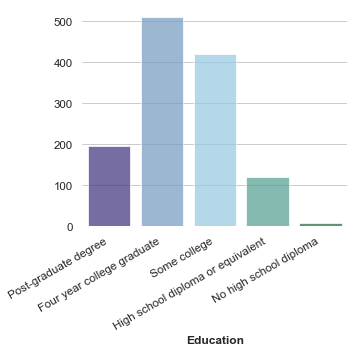

In [6]:
# Plot dist of educ
fig, ax = plt.subplots(figsize=(5, 5))

bar = sns.barplot(x='educ', y=0, 
                  data=(df.groupby('educ').size().reset_index()
                        .assign(order=[2,4,5,1,3])
                        .sort_values('order')
                       ), 
                  palette=palette_ptol12,
                  alpha=.7
                 )


plt.ylabel('')
plt.xlabel('Education', fontweight='bold', size=12)
plt.xticks(rotation=30, ha='right')

sns.despine(left=True, bottom=True)
plt.tight_layout()

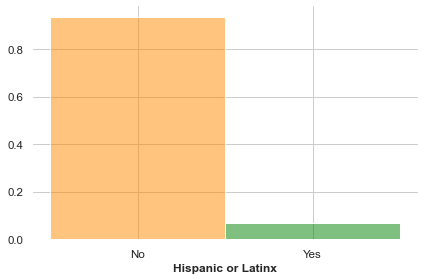

In [7]:
# Plot dist of hisla
sns.histplot(x='hisla', data=df, 
             stat='probability',
             hue='hisla', 
             palette=['darkorange', 'green'],
             legend=False
            )

plt.ylabel('')
plt.xlabel('Hispanic or Latinx', fontweight='bold', size=12)

sns.despine(left=True, bottom=True)
plt.tight_layout()

In [8]:
# # Plot dist of race (ends up being mostly White)
# sns.histplot(x='race', data=df, 
#              stat='probability',
#              hue='hisla', 
#              palette=['green', 'gray'],
#              legend=False
#             )

# plt.ylabel('')
# plt.xlabel('Hispanic or Latinx', fontweight='bold', size=12)
# plt.xticks(rotation=30, ha='right')

# sns.despine(left=True, bottom=True)
# plt.tight_layout()

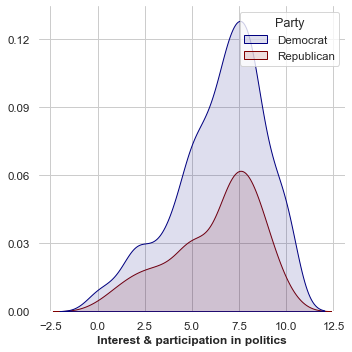

In [9]:
# Plot dist. in interest & participation in politics
fig, ax = plt.subplots(figsize=(5, 5))

sns.kdeplot(x='interest_1', data=df.query('pid in ["Democrat", "Republican"]'), 
            hue='pid',
            palette=['navy', 'maroon'],
            fill=True,
            alpha=.13, 
            ax=ax
           )

plt.ylabel('')
plt.xlabel('Interest & participation in politics', fontweight='bold', size=12)
plt.yticks([0, .03,.06,.09,.12])
ax.get_legend().set_title("Party")

sns.despine(left=True, bottom=True)
plt.tight_layout()

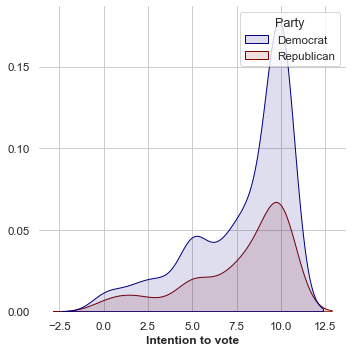

In [10]:
# Plot dist. in intention to vote (in 2018 congressional elections)
fig, ax = plt.subplots(figsize=(5, 5))

sns.kdeplot(x='vote_1', data=df.query('pid in ["Democrat", "Republican"]'), 
            hue='pid',
            palette=['navy', 'maroon'],
            fill=True,
            alpha=.13, 
            ax=ax
           )

plt.ylabel('')
plt.xlabel('Intention to vote', fontweight='bold', size=12)
plt.yticks([0, .05,.1,.15])
ax.get_legend().set_title("Party")

sns.despine(left=True, bottom=True)
plt.tight_layout()

<AxesSubplot:xlabel='question_type', ylabel='Count'>

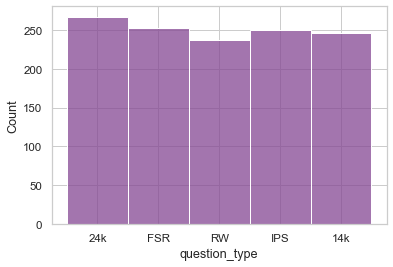

In [11]:
sns.histplot(data=df, x='question_type')

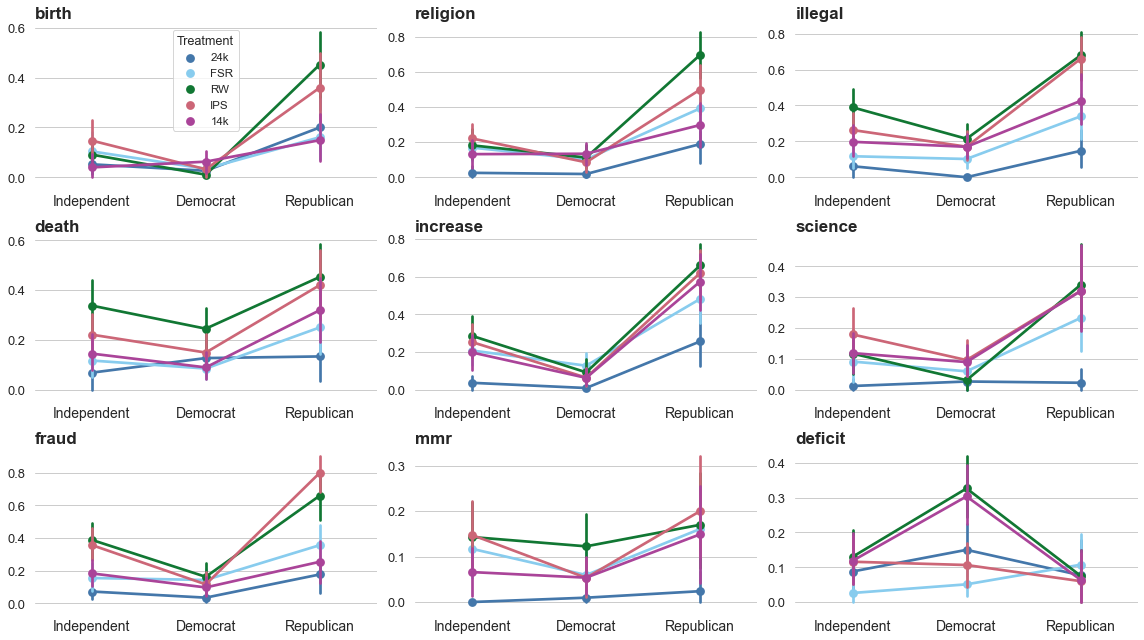

In [12]:
# Plot incorrectness across items, by party and treatment
fig = plt.figure(figsize=(16,9))

palette_ptol6 = ['#4477AA', '#88CCEE', '#117733', '#DDCC77', '#CC6677', '#AA4499']
palette_myptol5 = ['#4477AA', '#88CCEE', '#117733', '#CC6677', '#AA4499']
palette_ptol12 = ['#332288', '#6699CC', '#88CCEE', '#44AA99', '#117733']

for ix, item in enumerate(ITEMS[:9]):
    ax = plt.subplot(3, 3, 1+ix)
    sns.pointplot(x='pid', y=item, 
                  data=df.query('pid!="Something else"'), 
                  hue='question_type',
                  palette=palette_myptol5,
                  dodge=False
                 )
    
    plt.title(item, fontweight='bold', loc='left', size=17)
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(size=14)
    plt.yticks(size=13)
    
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    if ix > 0:
        ax.legend_.remove()
    else: 
        ax.get_legend().set_title("Treatment")


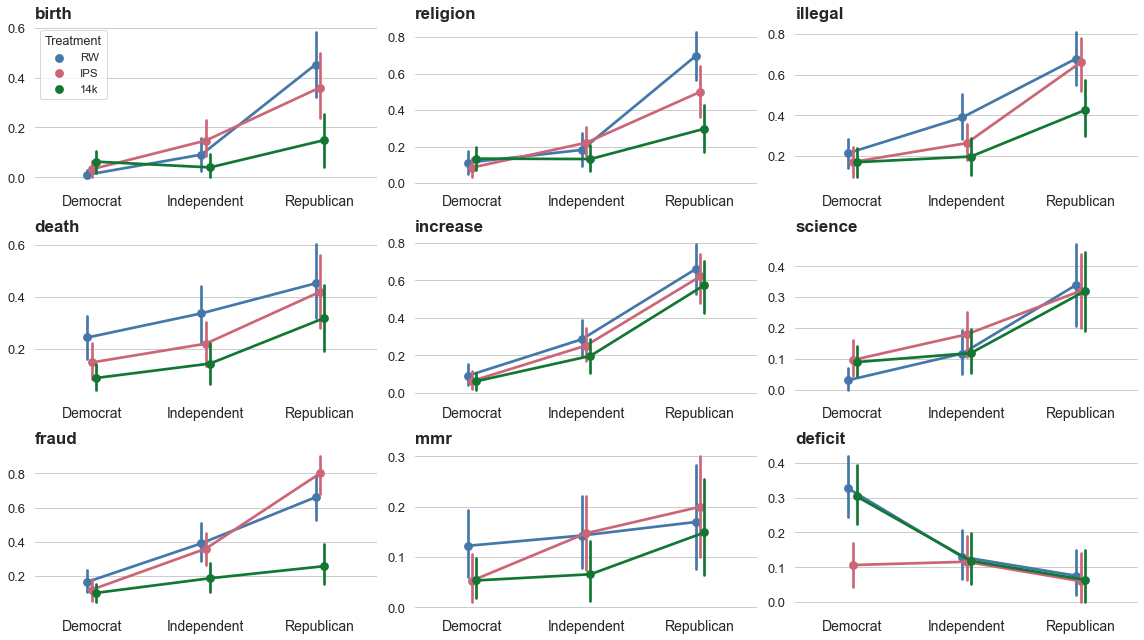

In [13]:
# Plot incorrectness across items, by party and treatment (RW, IPS, 14k)
fig = plt.figure(figsize=(16,9))

palette_ptol6 = ['#4477AA', '#88CCEE', '#117733', '#DDCC77', '#CC6677', '#AA4499']
palette_myptol5 = ['#4477AA', '#88CCEE', '#117733', '#CC6677', '#AA4499']
palette_ptol12 = ['#332288', '#6699CC', '#88CCEE', '#44AA99', '#117733']
palette_myptol3 = ['#4477AA', '#CC6677', '#117733']

for ix, item in enumerate(ITEMS[:9]):
    ax = plt.subplot(3, 3, 1+ix)
    sns.pointplot(x='pid', y=item, 
                  data=(df
                        .query('pid!="Something else"')
                        .query('question_type!="24k"')
                        .query('question_type!="FSR"')
                       ), 
                  hue='question_type',
                  palette=palette_myptol3,
                  dodge=True
                 )
    
    plt.title(item, fontweight='bold', loc='left', size=17)
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(size=14)
    plt.yticks(size=13)
    
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    if ix > 0:
        ax.legend_.remove()
    else: 
        ax.get_legend().set_title("Treatment")


<AxesSubplot:xlabel='pid_strength_1', ylabel='Count'>

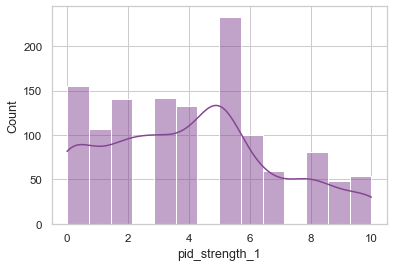

In [14]:
sns.histplot(data=df, x='pid_strength_1', kde=True)